##Random Forest Regression

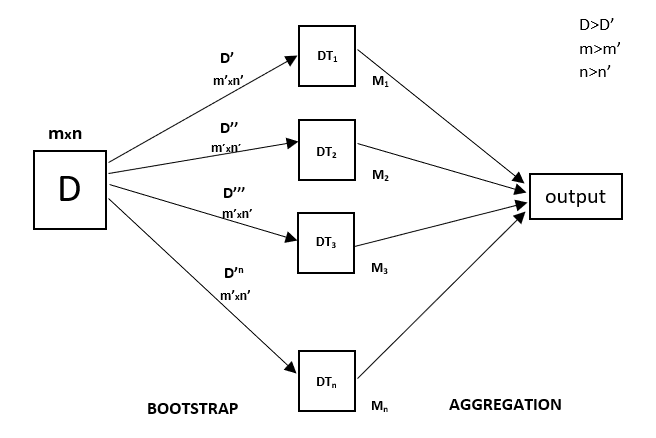

**Import Libraries**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


**Import Dataset**

In [9]:
import numpy as np
data = {
   " Position" : ["Business Analyst","Junior Consultant","Senior Consultant","Manager","Country Manager","Region Manager","Partner","Senior Partner","C-level","CEO"],
   "Level": np.arange(1,11),
   "Salary" : [45000,50000,60000,80000,110000,150000,200000,300000,5000000,1000000]
}

In [10]:
df = pd.DataFrame(data)


In [11]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,5000000
9,CEO,10,1000000


.info()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0    Position  10 non-null     object
 1   Level      10 non-null     int64 
 2   Salary     10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


Assuming df is your DataFrame

In [13]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

**Random Forest Regressor Model**

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(x, y)


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

**Make predictions and Evaluation**

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
predictions = regressor.predict(x)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.10446237726874263
Mean Squared Error: 467565825000.0
R-squared: 0.7803424155808556


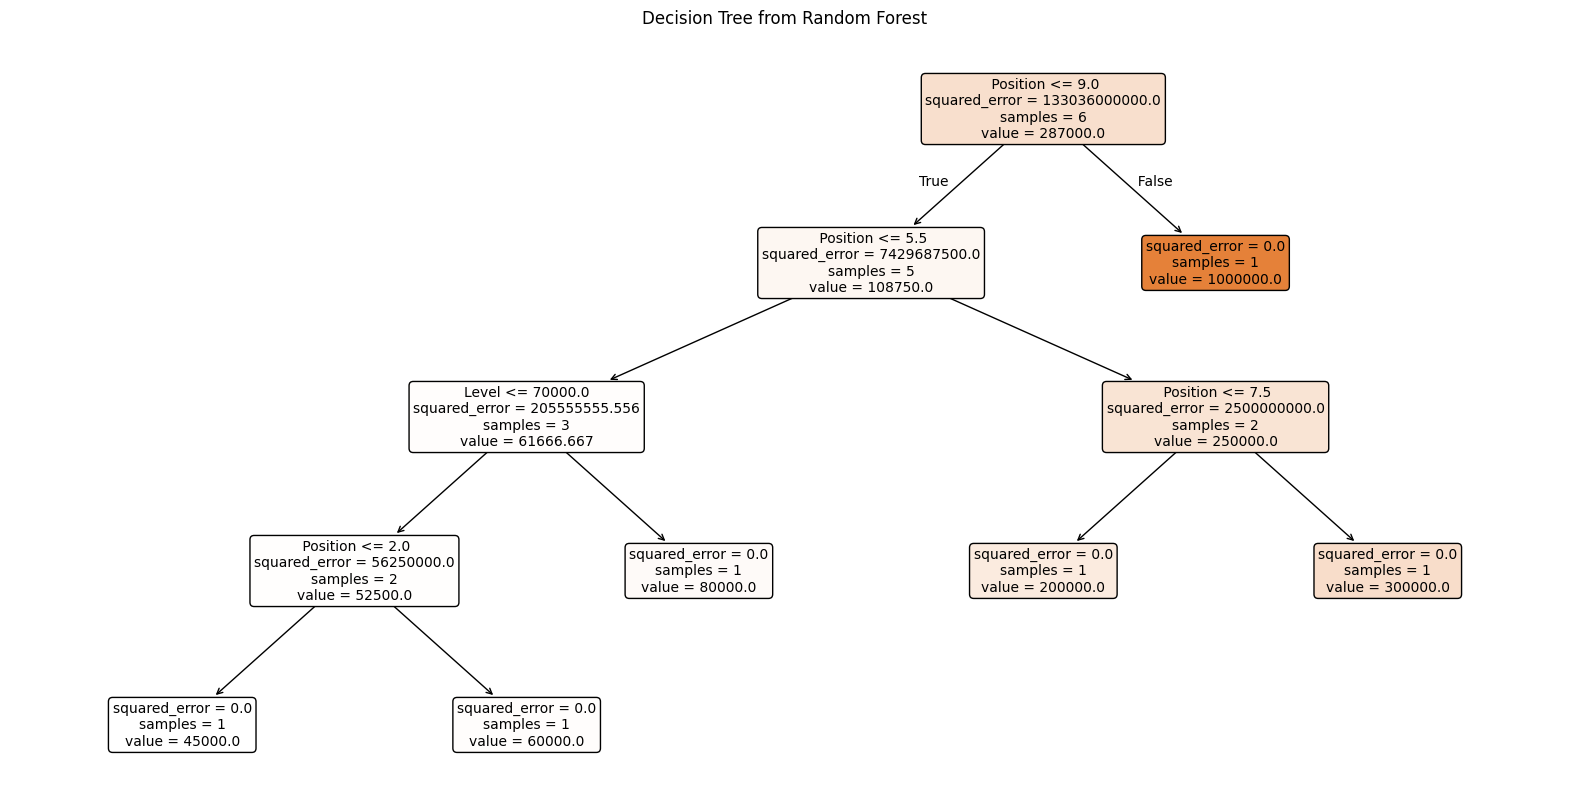

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()